In [1]:
from IPython.display import display, Markdown
display(Markdown("[Data_Link](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data)"))

[Data_Link](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data)

In [2]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
%matplotlib inline

## Function and modules for the supervised Classification models

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


## Function and modules for data analysis and model evaluation

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

## Function and modules for data preparation and visualization

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf


In [6]:
sns.set()

## Loading Data

In [7]:
# Reading the dataset

data=pd.read_csv("germancredit.csv")
data

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,A14,12,A32,A42,1736,A61,A74,3,A92,...,4,A121,31,A143,A152,1,A172,1,A191,A201
996,0,A11,30,A32,A41,3857,A61,A73,4,A91,...,4,A122,40,A143,A152,1,A174,1,A192,A201
997,0,A14,12,A32,A43,804,A61,A75,4,A93,...,4,A123,38,A143,A152,1,A173,1,A191,A201
998,1,A11,45,A32,A43,1845,A61,A73,4,A93,...,4,A124,23,A143,A153,1,A173,1,A192,A201


In [8]:
''' 
Target Variable: Default
Predictors: duration, history, purpose, amount, savings etc.
Default = 1 means the loan was a good decision.
Default = 0 means the loan was a bad decision.

''' 

' \nTarget Variable: Default\nPredictors: duration, history, purpose, amount, savings etc.\nDefault = 1 means the loan was a good decision.\nDefault = 0 means the loan was a bad decision.\n\n'

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Default          1000 non-null   int64 
 1   checkingstatus1  1000 non-null   object
 2   duration         1000 non-null   int64 
 3   history          1000 non-null   object
 4   purpose          1000 non-null   object
 5   amount           1000 non-null   int64 
 6   savings          1000 non-null   object
 7   employ           1000 non-null   object
 8   installment      1000 non-null   int64 
 9   status           1000 non-null   object
 10  others           1000 non-null   object
 11  residence        1000 non-null   int64 
 12  property         1000 non-null   object
 13  age              1000 non-null   int64 
 14  otherplans       1000 non-null   object
 15  housing          1000 non-null   object
 16  cards            1000 non-null   int64 
 17  job              1000 non-null   o

In [10]:
data.describe()

,Default,duration,amount,installment,residence,age,cards,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [11]:
data.isnull().sum()

Default            0
checkingstatus1    0
duration           0
history            0
purpose            0
amount             0
savings            0
employ             0
installment        0
status             0
others             0
residence          0
property           0
age                0
otherplans         0
housing            0
cards              0
job                0
liable             0
tele               0
foreign            0
dtype: int64

In [12]:
data.isna().sum()

Default            0
checkingstatus1    0
duration           0
history            0
purpose            0
amount             0
savings            0
employ             0
installment        0
status             0
others             0
residence          0
property           0
age                0
otherplans         0
housing            0
cards              0
job                0
liable             0
tele               0
foreign            0
dtype: int64

0    700
1    300
Name: Default, dtype: int64


<AxesSubplot:>

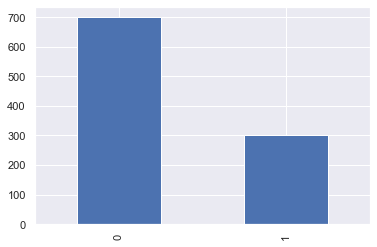

In [13]:
# # Creating Bar chart as the Target variable is Categorical

print(data["Default"].value_counts())
data["Default"].value_counts().plot(kind = 'bar')

# EDA

In [14]:
# Let's check the number of unique values in each column

data.nunique()

Default              2
checkingstatus1      4
duration            33
history              5
purpose             10
amount             921
savings              5
employ               5
installment          4
status               4
others               3
residence            4
property             4
age                 53
otherplans           3
housing              3
cards                4
job                  4
liable               2
tele                 2
foreign              2
dtype: int64

In [15]:
from sklearn.preprocessing import OrdinalEncoder
# Creating an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

cat_cols = data.select_dtypes(include = object).columns.tolist()

# Copying the dataframe to avoid changing the original one
data_encoded = data.copy()
# Encoding the categorical columns
data_encoded[cat_cols] = encoder.fit_transform(data[cat_cols])

data_encoded


,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,0.0,6,4.0,4.0,1169,4.0,4.0,4,2.0,...,4,0.0,67,2.0,1.0,2,2.0,1,1.0,0.0
1,1,1.0,48,2.0,4.0,5951,0.0,2.0,2,1.0,...,2,0.0,22,2.0,1.0,1,2.0,1,0.0,0.0
2,0,3.0,12,4.0,7.0,2096,0.0,3.0,2,2.0,...,3,0.0,49,2.0,1.0,1,1.0,2,0.0,0.0
3,0,0.0,42,2.0,3.0,7882,0.0,3.0,2,2.0,...,4,1.0,45,2.0,2.0,1,2.0,2,0.0,0.0
4,1,0.0,24,3.0,0.0,4870,0.0,2.0,3,2.0,...,4,3.0,53,2.0,2.0,2,2.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3.0,12,2.0,3.0,1736,0.0,3.0,3,1.0,...,4,0.0,31,2.0,1.0,1,1.0,1,0.0,0.0
996,0,0.0,30,2.0,1.0,3857,0.0,2.0,4,0.0,...,4,1.0,40,2.0,1.0,1,3.0,1,1.0,0.0
997,0,3.0,12,2.0,4.0,804,0.0,4.0,4,2.0,...,4,2.0,38,2.0,1.0,1,2.0,1,0.0,0.0
998,1,0.0,45,2.0,4.0,1845,0.0,2.0,4,2.0,...,4,3.0,23,2.0,2.0,1,2.0,1,1.0,0.0


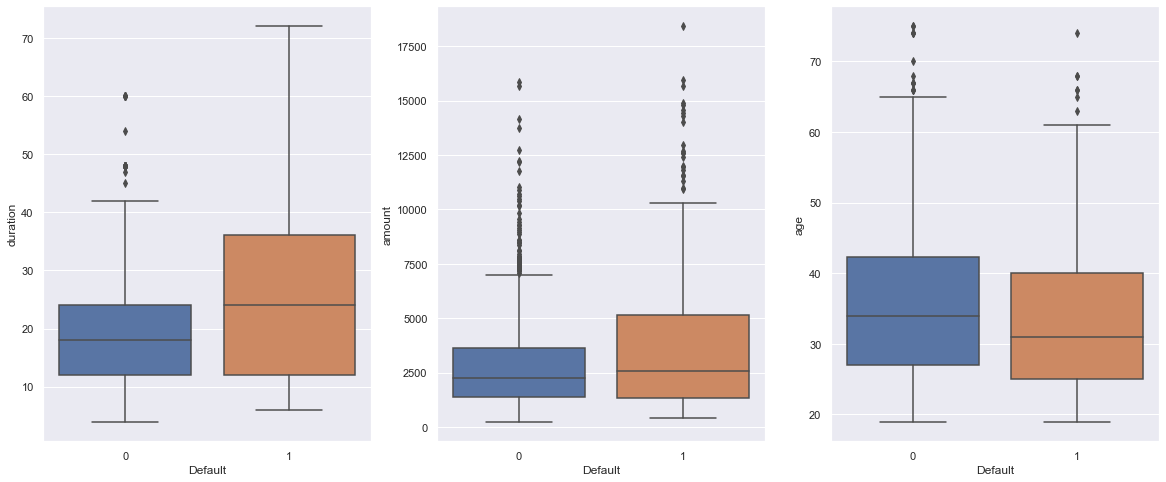

In [16]:
#Boxplots for quantitative predictors
#select only the numeric columns in the DataFrame
#quan_var = data.select_dtypes(include=np.number)
quan_var = ['duration', 'amount', 'age']
plt.figure(figsize=(20,8))
#data.boxplot(by = 'Default', column = ['duration'])
for i,name in enumerate(quan_var):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x = 'Default', y = name, data = data)

In [17]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

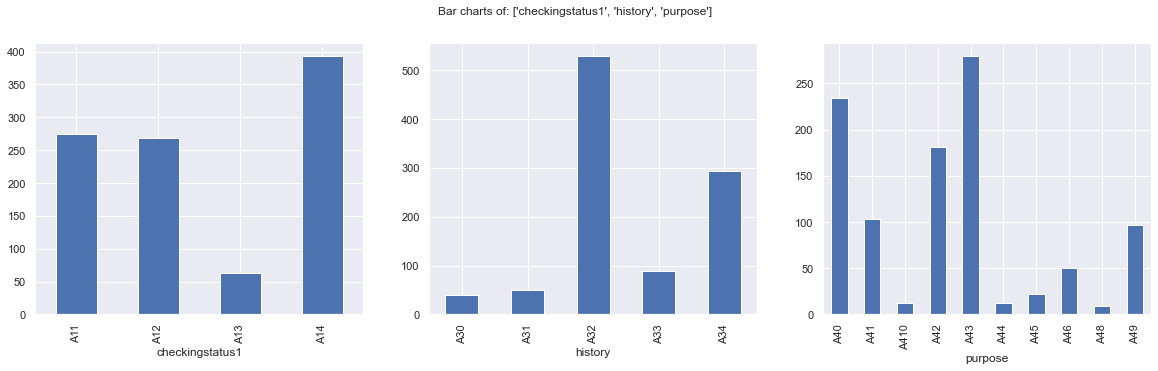

In [20]:
##barplots for qualitative predictors

qual_var = data.select_dtypes(include = object).columns.tolist()
qual_var.append('liable')

PlotBarCharts(inpData=data, 
              colsToPlot=qual_var[:3])

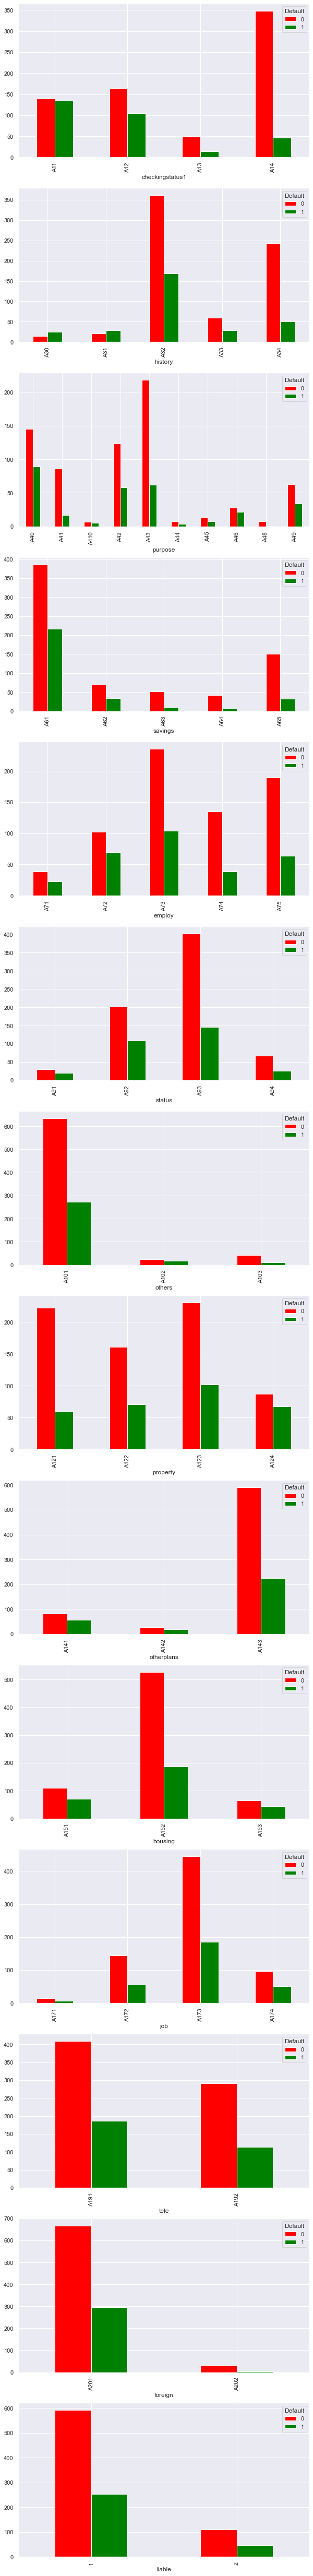

In [21]:
fig, PlotCanvas=plt.subplots(nrows=len(qual_var), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(qual_var, range(len(qual_var))):
    CrossTabResult=pd.crosstab(index=data[CategoricalCol], columns=data['Default'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])


## Train-Test Split

In [107]:
data_encoded.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,0.0,6,4.0,4.0,1169,4.0,4.0,4,2.0,...,4,0.0,67,2.0,1.0,2,2.0,1,1.0,0.0
1,1,1.0,48,2.0,4.0,5951,0.0,2.0,2,1.0,...,2,0.0,22,2.0,1.0,1,2.0,1,0.0,0.0
2,0,3.0,12,4.0,7.0,2096,0.0,3.0,2,2.0,...,3,0.0,49,2.0,1.0,1,1.0,2,0.0,0.0
3,0,0.0,42,2.0,3.0,7882,0.0,3.0,2,2.0,...,4,1.0,45,2.0,2.0,1,2.0,2,0.0,0.0
4,1,0.0,24,3.0,0.0,4870,0.0,2.0,3,2.0,...,4,3.0,53,2.0,2.0,2,2.0,2,0.0,0.0


In [108]:
# input
x = data_encoded.iloc[:, 1:].values
 
# output
y = data_encoded.iloc[:, 0].values

#Spliting the data in 80:20 training to testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


# Scaling Data

In [109]:
#Applying MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape

(800, 20)

# ML Models

In [110]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(random_state=0)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis())) 
models.append(('AdaB', AdaBoostClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('SVM', svm.SVC(C=2, kernel='rbf', gamma=0.1)))

In [111]:
models

[('LR', LogisticRegression()),
 ('NB', GaussianNB()),
 ('RF', RandomForestClassifier(random_state=0)),
 ('DT', DecisionTreeClassifier()),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None,
                enable_categorical=False, gamma=None, gpu_id=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, reg_alpha=None,
                reg_lambda=None, scale_pos_weight=None, subsample=None,
                tree_method=None, validate_parameters=None, verbosity=None)),
 ('LDA', LinearDiscriminantAnalysis()),
 ('QDA', QuadraticDiscriminantAnalysis()),
 ('AdaB', AdaBoostClassifier()),
 ('KNN', KNeighborsClassifier

# Model training and Testing

In [112]:
num_folds = 10
scoring = 'accuracy'


names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models: 
    names.append(name)
    ## k-fold analysis:
    kfold = KFold(n_splits=num_folds,shuffle=True, random_state= 10)
    #converted mean squared error to positive. The lower the better
    cv_results = 1* cross_val_score(model, x_train, y_train, cv=kfold, \
    scoring=scoring)
    kfold_results.append(cv_results)
    # Full Training period
    res = model.fit(x_train, y_train)
    train_result = accuracy_score(res.predict(x_train), y_train)*100
    train_results.append(train_result)
    # Test results
    test_result = accuracy_score(res.predict(x_test), y_test)*100
    test_results.append(test_result)

[18:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Let’s compare the algorithms by looking at the cross validation results:

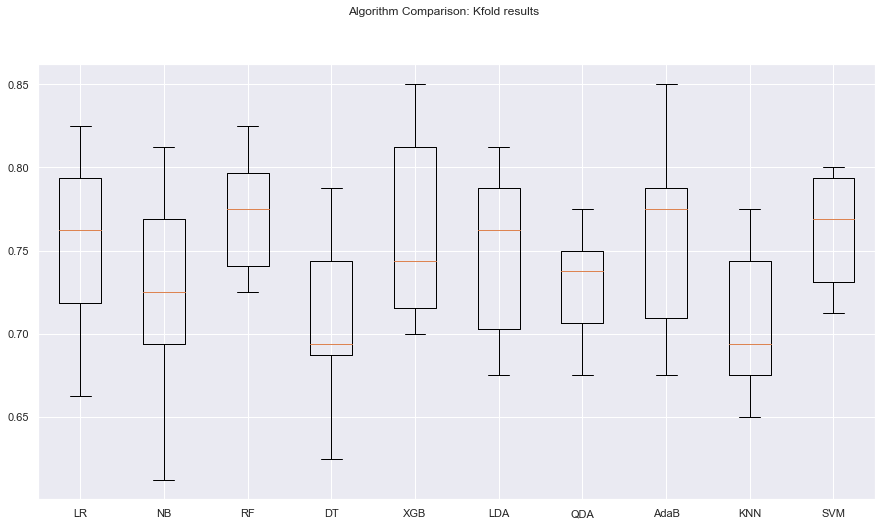

In [113]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

## Let us look at the accuracy of the test set as well

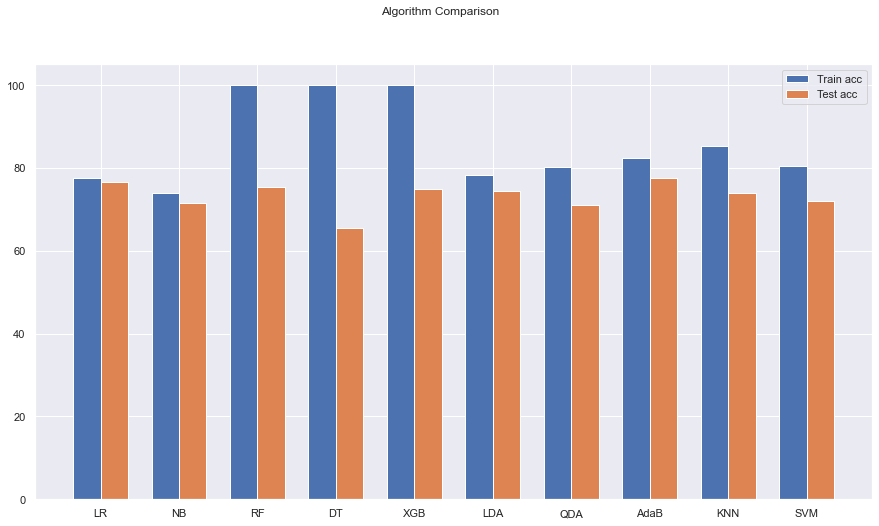

In [114]:
# compare algorithms
fig = pyplot.figure()
ind = np.arange(len(names)) # the x locations for the groups
width = 0.35 # the width of the bars
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results, width=width, label='Train acc')
pyplot.bar(ind + width/2, test_results, width=width, label='Test acc')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

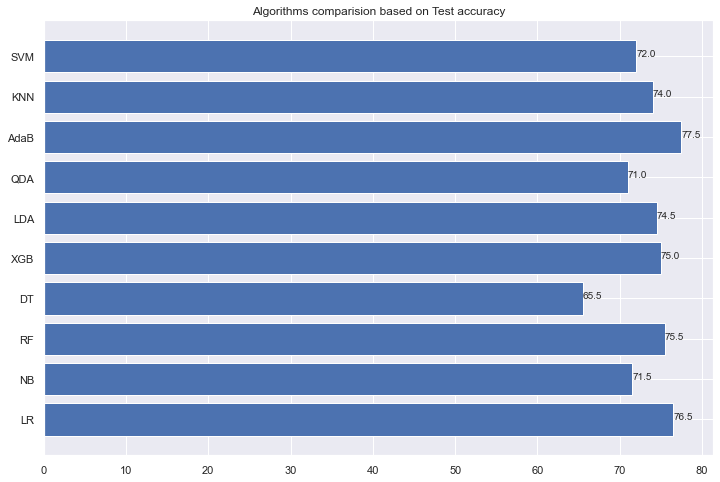

In [115]:
plt.figure(figsize = (12,8))
plt.barh(names, test_results)
 
for index, value in enumerate(test_results):
    plt.text(value, index,
             str(value))
plt.title("Algorithms comparision based on Test accuracy") 
plt.show()

# Features Selection by Chi-Square Test

In [116]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [117]:
# For all Columns
CategoricalVariablesList = data_encoded.columns.tolist()
FunctionChisq(inpData=data_encoded, TargetVariable='Default', CategoricalVariablesList=data_encoded.columns.tolist())

Default is correlated with Default | P-Value: 1.9413443913774672e-218
checkingstatus1 is correlated with Default | P-Value: 1.2189020722893755e-26
duration is correlated with Default | P-Value: 7.784571960945828e-06
history is correlated with Default | P-Value: 1.2791872956751013e-12
purpose is correlated with Default | P-Value: 0.00011574910079691586
amount is NOT correlated with Default | P-Value: 0.3865967855326757
savings is correlated with Default | P-Value: 2.7612142385682596e-07
employ is correlated with Default | P-Value: 0.0010454523491402541
installment is NOT correlated with Default | P-Value: 0.1400333122128481
status is correlated with Default | P-Value: 0.02223800546926877
others is correlated with Default | P-Value: 0.036055954027247226
residence is NOT correlated with Default | P-Value: 0.8615521320413175
property is correlated with Default | P-Value: 2.8584415733250017e-05
age is NOT correlated with Default | P-Value: 0.2795420590036425
otherplans is correlated with De

['Default',
 'checkingstatus1',
 'duration',
 'history',
 'purpose',
 'savings',
 'employ',
 'status',
 'others',
 'property',
 'otherplans',
 'housing',
 'foreign']

In [118]:
Corr_Var = ['checkingstatus1', 'duration', 'history', 'purpose', 'savings', 'employ','status','others','property','otherplans','housing','foreign' ]
X_Corr = data_encoded.loc[:, ['checkingstatus1', 'duration', 'history', 'purpose', 'savings', 'employ','status','others','property','otherplans','housing','foreign' ]]
Y_Corr = data_encoded.loc[:, ['Default']]


In [119]:
#Spliting the data in 80:20 training to testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Corr, Y_Corr, test_size = 0.2, random_state = 0)

# Scaling

#Applying MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(800, 12)

In [120]:
num_folds = 10
scoring = 'accuracy'


names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models: 
    names.append(name)
    ## k-fold analysis:
    kfold = KFold(n_splits=num_folds,shuffle=True, random_state= 10)
    #converted mean squared error to positive. The lower the better
    cv_results = 1* cross_val_score(model, X_train, Y_train, cv=kfold, \
    scoring=scoring)
    kfold_results.append(cv_results)
    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = accuracy_score(res.predict(X_train), Y_train)*100
    train_results.append(train_result)
    # Test results
    test_result = accuracy_score(res.predict(X_test), Y_test)*100
    test_results.append(test_result)

[18:49:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

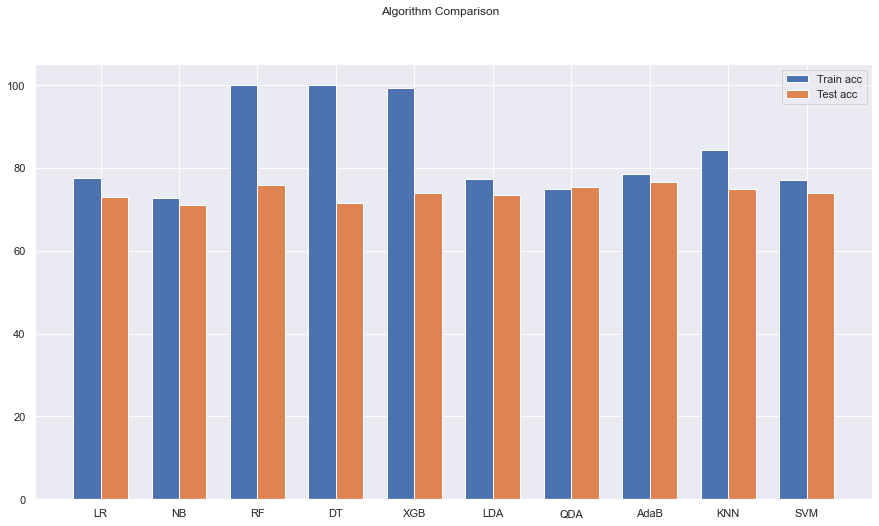

In [121]:
# compare algorithms
fig = pyplot.figure()
ind = np.arange(len(names)) # the x locations for the groups
width = 0.35 # the width of the bars
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results, width=width, label='Train acc')
pyplot.bar(ind + width/2, test_results, width=width, label='Test acc')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

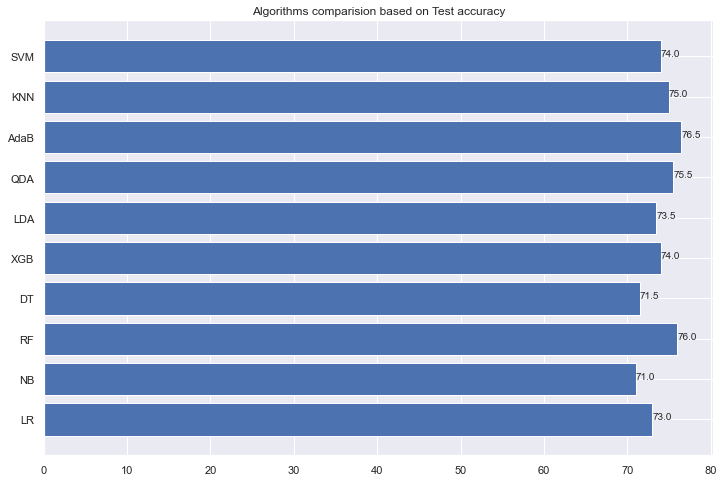

In [122]:
plt.figure(figsize = (12,8))
plt.barh(names, test_results)
 
for index, value in enumerate(test_results):
    plt.text(value, index,
             str(value))
plt.title("Algorithms comparision based on Test accuracy") 
plt.show()

## ANOVA

In [123]:
# Defining a function to find the statistical relationship with all  variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [124]:
# Calling the function to check which variables are correlated with target

FunctionAnova(inpData=data_encoded, TargetVariable='Default', ContinuousPredictorList=data_encoded.columns.tolist())

##### ANOVA Results ##### 

Default is correlated with Default | P-Value: 0.0
checkingstatus1 is correlated with Default | P-Value: 2.4416618064128288e-30
duration is correlated with Default | P-Value: 6.488049877187189e-12
history is correlated with Default | P-Value: 2.4230600689647656e-13
purpose is NOT correlated with Default | P-Value: 0.9618536879893452
amount is correlated with Default | P-Value: 8.797572373533373e-07
savings is correlated with Default | P-Value: 1.2147983456827244e-08
employ is correlated with Default | P-Value: 0.0002367939320576643
installment is correlated with Default | P-Value: 0.022035486306960176
status is correlated with Default | P-Value: 0.005261326205666935
others is NOT correlated with Default | P-Value: 0.427180494598151
residence is NOT correlated with Default | P-Value: 0.9253374212983783
property is correlated with Default | P-Value: 5.97405808733942e-06
age is correlated with Default | P-Value: 0.003925339398278295
otherplans is correlated with

['Default',
 'checkingstatus1',
 'duration',
 'history',
 'amount',
 'savings',
 'employ',
 'installment',
 'status',
 'property',
 'age',
 'otherplans',
 'foreign']

In [125]:
Corr_var = ['checkingstatus1', 'duration', 'history', 'amount', 'savings', 'employ','installment','status','property','age','otherplans','foreign' ]
x_Corr = data_encoded.loc[:, ['checkingstatus1', 'duration', 'history', 'amount', 'savings', 'employ','installment','status','property','age','otherplans','foreign' ]]
y_Corr = data_encoded.loc[:, ['Default']]


In [126]:
#Spliting the data in 80:20 training to testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_Corr, y_Corr, test_size = 0.2, random_state = 0)

# Scaling

#Applying MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
Xtrain = scaler.fit_transform(x_train)
Xtest = scaler.transform(x_test)
Xtrain.shape

(800, 20)

In [127]:
num_folds = 10
scoring = 'accuracy'


names = []
kfold_results_Anova = []
test_results_Anova = []
train_results_Anova = []
for name, model in models: 
    names.append(name)
    ## k-fold analysis:
    kfold = KFold(n_splits=num_folds,shuffle=True, random_state= 10)
    #converted mean squared error to positive. The lower the better
    cv_results = 1* cross_val_score(model, Xtrain, Ytrain, cv=kfold, \
    scoring=scoring)
    kfold_results_Anova.append(cv_results)
    # Full Training period
    res = model.fit(Xtrain, Ytrain)
    train_result = accuracy_score(res.predict(Xtrain), Ytrain)*100
    train_results_Anova.append(train_result)
    # Test results
    test_result = accuracy_score(res.predict(Xtest), Ytest)*100
    test_results_Anova.append(test_result)

[18:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

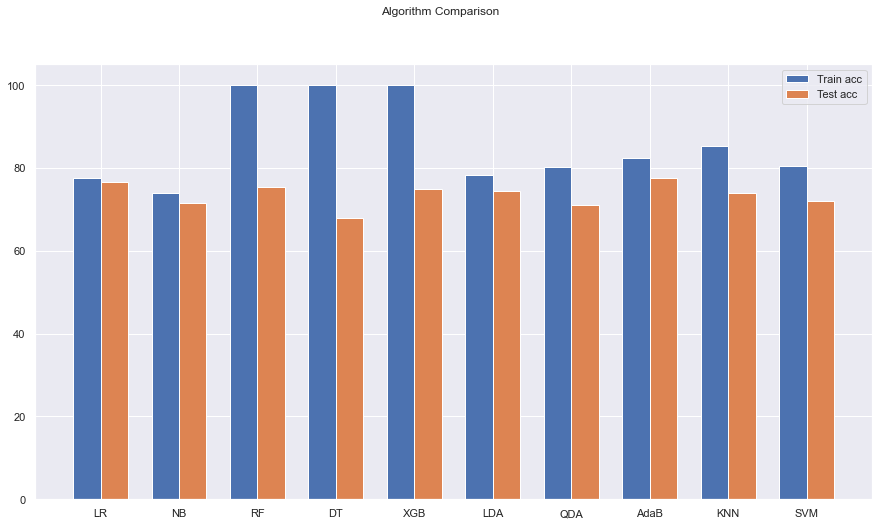

In [128]:
# compare algorithms
fig = pyplot.figure()
ind = np.arange(len(names)) # the x locations for the groups
width = 0.35 # the width of the bars
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results_Anova, width=width, label='Train acc')
pyplot.bar(ind + width/2, test_results_Anova, width=width, label='Test acc')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

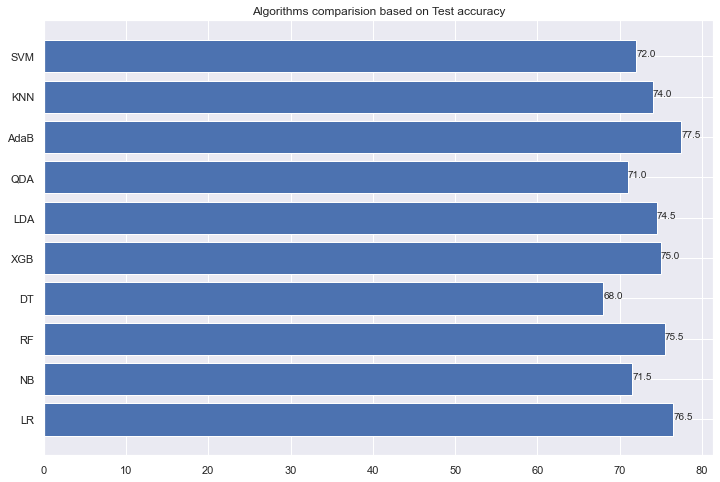

In [129]:
plt.figure(figsize = (12,8))
plt.barh(names, test_results_Anova)
 
for index, value in enumerate(test_results_Anova):
    plt.text(value, index,
             str(value))
plt.title("Algorithms comparision based on Test accuracy") 
plt.show()

## Select Logistic regression as the Best Model

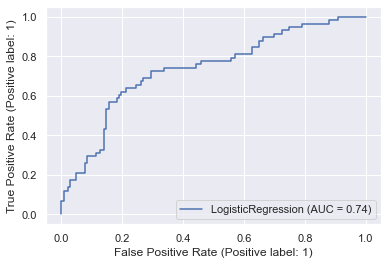

Logistic Regression model accuracy(in %): 76.5
              precision    recall  f1-score   support

           0     0.8276    0.8451    0.8362       142
           1     0.6000    0.5690    0.5841        58

    accuracy                         0.7650       200
   macro avg     0.7138    0.7070    0.7102       200
weighted avg     0.7616    0.7650    0.7631       200



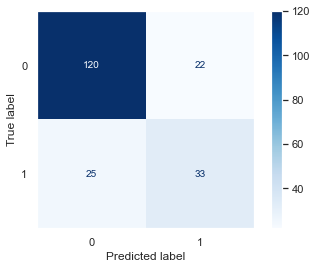

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

 
model_1 = LogisticRegression()

# fitting the model on the train data
model_1.fit(Xtrain, Ytrain)

from sklearn import metrics
metrics.plot_roc_curve(model_1, Xtest, Ytest)
plt.show()

predictions = model_1.predict(Xtest)
print("Logistic Regression model accuracy(in %):", accuracy_score(Ytest, predictions)*100)
plot_confusion_matrix(model_1,Xtest,Ytest,cmap='Blues')
plt.grid(False)

from sklearn.metrics import classification_report
print(classification_report(Ytest, predictions, digits = 4))

In [131]:
model_1.coef_

array([[-1.61982003,  1.77999882, -1.56775188, -0.10734385,  1.15541051,
        -0.93690145, -0.65274643,  0.84575253, -0.68257879, -0.70608491,
         0.02654097,  0.80664136, -0.26955544, -0.43730346, -0.81993888,
         0.53649035,  0.10099705,  0.3048576 , -0.34914887, -0.84062033]])

In [132]:
model_1.intercept_

array([1.11379478])

# Tuning the final Model

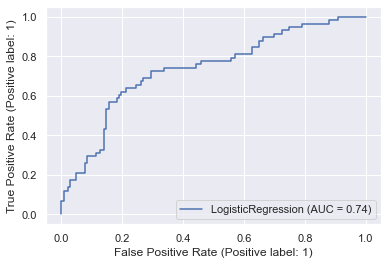

Logistic Regression model accuracy(in %): 76.5
              precision    recall  f1-score   support

           0     0.8276    0.8451    0.8362       142
           1     0.6000    0.5690    0.5841        58

    accuracy                         0.7650       200
   macro avg     0.7138    0.7070    0.7102       200
weighted avg     0.7616    0.7650    0.7631       200



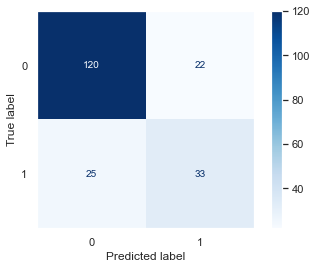

In [133]:

model_1 = LogisticRegression(penalty='l2',tol=0.0005, max_iter=1000 )
# fitting the model on the train data
model_1.fit(Xtrain, Ytrain)

from sklearn import metrics
metrics.plot_roc_curve(model_1, Xtest, Ytest)
plt.show()

predictions = model_1.predict(Xtest)
print("Logistic Regression model accuracy(in %):", accuracy_score(Ytest, predictions)*100)
plot_confusion_matrix(model_1,Xtest,Ytest,cmap='Blues')
plt.grid(False)

from sklearn.metrics import classification_report
print(classification_report(Ytest, predictions, digits = 4))

